# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [63]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [65]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [66]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')


In [67]:
# Extract all rows of data
table = html_soup.find("table", class_="table")


In [68]:
table_row = table.find_all('tr')


In [172]:
#print(table_row)

In [70]:
table_row2=table.find_all("td")

In [71]:
print(table_row2)

[<td>2</td>, <td>2012-08-16</td>, <td>10</td>, <td>155</td>, <td>6</td>, <td>-75.0</td>, <td>739.0</td>, <td>13</td>, <td>2012-08-17</td>, <td>11</td>, <td>156</td>, <td>6</td>, <td>-76.0</td>, <td>740.0</td>, <td>24</td>, <td>2012-08-18</td>, <td>12</td>, <td>156</td>, <td>6</td>, <td>-76.0</td>, <td>741.0</td>, <td>35</td>, <td>2012-08-19</td>, <td>13</td>, <td>157</td>, <td>6</td>, <td>-74.0</td>, <td>732.0</td>, <td>46</td>, <td>2012-08-20</td>, <td>14</td>, <td>157</td>, <td>6</td>, <td>-74.0</td>, <td>740.0</td>, <td>57</td>, <td>2012-08-21</td>, <td>15</td>, <td>158</td>, <td>6</td>, <td>-78.0</td>, <td>740.0</td>, <td>68</td>, <td>2012-08-22</td>, <td>16</td>, <td>158</td>, <td>6</td>, <td>-77.0</td>, <td>740.0</td>, <td>79</td>, <td>2012-08-23</td>, <td>17</td>, <td>159</td>, <td>6</td>, <td>-76.0</td>, <td>742.0</td>, <td>112</td>, <td>2012-08-27</td>, <td>21</td>, <td>161</td>, <td>6</td>, <td>-74.0</td>, <td>741.0</td>, <td>114</td>, <td>2012-08-28</td>, <td>22</td>, <td>16

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [72]:
# Create an empty list
table_list_header=[]

# Loop through the scraped data to create a list of rows
for x in table_row:
    row_heading = x.find_all('th')
    table_list_header.append(row_heading)
    
    


In [73]:
table_list_header


[[<th>id</th>,
  <th>terrestrial_date</th>,
  <th>sol</th>,
  <th>ls</th>,
  <th>month</th>,
  <th>min_temp</th>,
  <th>pressure</th>],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],

In [116]:
table_list_rows=[]

In [109]:
for x in table_row:
    print(row)

1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135
5
-77.0
727.0
1895
2018-02-27
1977
135


In [117]:
# Create an empty list


# Loop through the scraped data to create a list of rows
for x in table_row:
    row = x.text.strip()
    row =row.split("\n")
    table_list_rows.append(row)

In [118]:
table_list_rows

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165'

In [125]:
df=pd.DataFrame(table_list_rows)
df.head

<bound method NDFrame.head of          0                 1     2    3      4         5         6
0       id  terrestrial_date   sol   ls  month  min_temp  pressure
1        2        2012-08-16    10  155      6     -75.0     739.0
2       13        2012-08-17    11  156      6     -76.0     740.0
3       24        2012-08-18    12  156      6     -76.0     741.0
4       35        2012-08-19    13  157      6     -74.0     732.0
...    ...               ...   ...  ...    ...       ...       ...
1863  1889        2018-02-23  1973  133      5     -78.0     730.0
1864  1892        2018-02-24  1974  134      5     -77.0     729.0
1865  1894        2018-02-25  1975  134      5     -76.0     729.0
1866  1893        2018-02-26  1976  135      5     -77.0     728.0
1867  1895        2018-02-27  1977  135      5     -77.0     727.0

[1868 rows x 7 columns]>

In [ ]:
#https://stackoverflow.com/questions/26147180/convert-row-to-column-header-for-pandas-dataframe

In [127]:
df.columns = df.iloc[0]
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [130]:
df=df.drop(df.index[0])

In [131]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names


In [8]:
# Confirm DataFrame was created successfully


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 116.7+ KB


In [9]:
# Examine data type of each column


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [135]:
# Change data types for data analysis
df["terrestrial_date"]=pd.to_datetime(df["terrestrial_date"])


In [146]:
df["sol"]=df["sol"].astype("int64")

In [147]:
df["ls"]=df["ls"].astype("int64")

In [148]:
df["month"]=df["month"].astype("int64")

In [149]:
df["min_temp"]=df["min_temp"].astype("float64")

In [150]:
df["pressure"]=df["pressure"].astype("float64")

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 116.7+ KB


In [11]:
# Confirm type changes were successful by examining data types again


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [160]:
months=df["month"].unique()

In [163]:
#number of months on mars
print(len(months))

12


In [12]:
# 1. How many months are there on Mars?


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [166]:
# 2. How many Martian days' worth of data are there?
df["sol"].count()

1867

In [198]:
# 3. What is the average low temperature by month?
df_months=df.groupby(df["month"]).mean()

In [199]:
df_months

,sol,ls,min_temp,pressure
month,,,,
1,1077.574713,15.281609,-77.160920,862.488506
2,1175.853933,44.258427,-79.932584,889.455056
3,1204.406250,75.010417,-83.307292,877.322917
4,1244.500000,104.365979,-82.747423,806.329897
5,1182.691275,132.885906,-79.308725,748.557047
6,750.829932,164.897959,-75.299320,745.054422
7,715.105634,194.894366,-72.281690,795.105634
8,795.333333,224.347518,-68.382979,873.829787
9,861.186567,254.052239,-69.171642,913.305970


In [171]:
df_months["min_temp"]

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [14]:
# 3. What is the average low temperature by month?


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


Text(0, 0.5, 'Temp in Celcius')

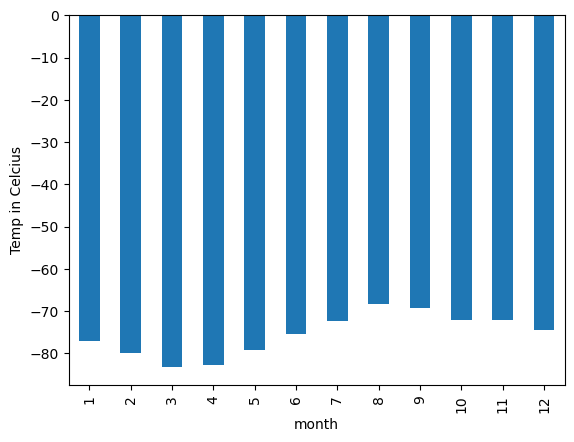

In [180]:
# Plot the average temperature by month
df_months["min_temp"].plot(kind="bar")
plt.ylabel("Temp in Celcius")

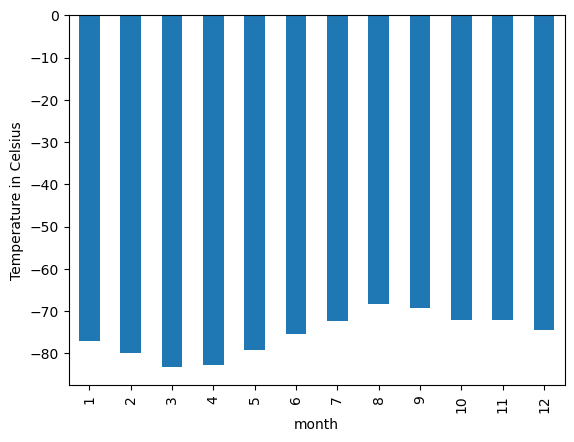

In [15]:
# Plot the average temperature by month


In [202]:
# Identify the coldest and hottest months in Curiosity's location
df_months["min_temp"].sort_values()
#df=pd.DataFrame(table_list_rows)
#sort_months=pd.DataFrame(sort_months)


month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

Text(0, 0.5, 'Temp in Celcius')

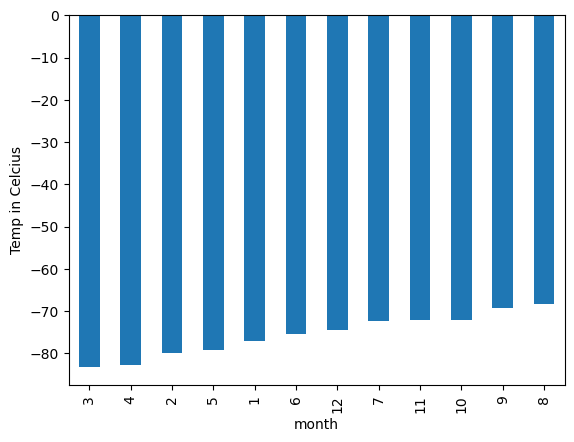

In [203]:
df_months["min_temp"].sort_values().plot(kind="bar")
plt.ylabel("Temp in Celcius")

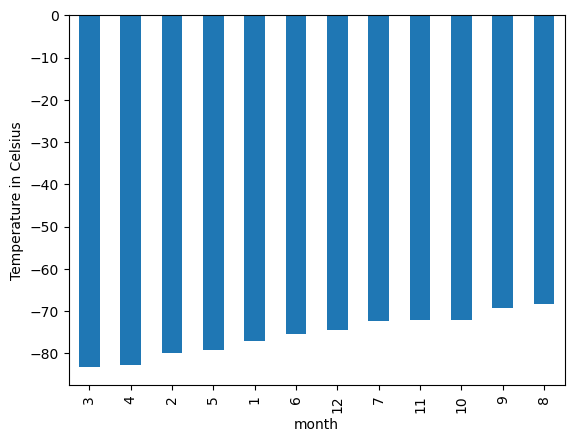

In [16]:
# Identify the coldest and hottest months in Curiosity's location


In [204]:
# 4. Average pressure by Martian month
df_months["pressure"]

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [17]:
# 4. Average pressure by Martian month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


Text(0, 0.5, 'Pressure in Atmosphere')

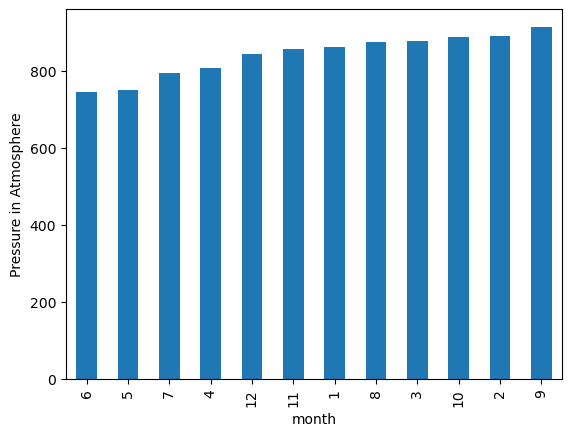

In [207]:
# Plot the average pressure by month
df_months["pressure"].sort_values().plot(kind="bar")
plt.ylabel("Pressure in Atmosphere")

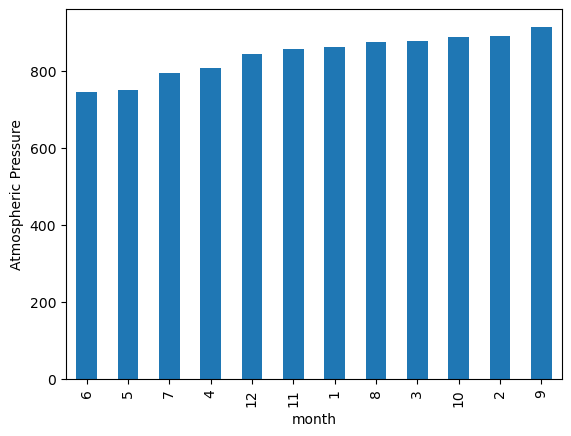

In [18]:
# Plot the average pressure by month


In [211]:
# 5. How many terrestrial (earth) days are there in a Martian year?
earth_days=df["terrestrial_date"].unique()
print(len(earth_days))

1867


In [221]:
print(len(df["min_temp"]))

1867


In [224]:
df["terrestrial_date"].iloc[0]

Timestamp('2012-08-16 00:00:00')

In [242]:
df["terrestrial_date"].iloc[311]

Timestamp('2013-08-17 00:00:00')

In [244]:
#number of martian days in an earth year
df["sol"].loc[311]

357

In [230]:
df["terrestrial_date"].loc["2013-08-15"]

TypeError: Cannot index by location index with a non-integer key

Text(0.5, 0, 'Number of Earth Days')

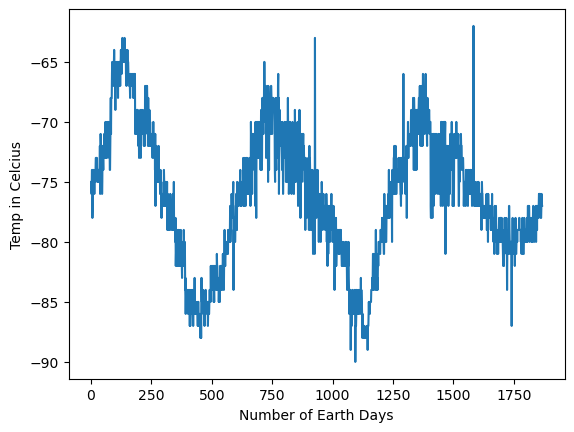

In [248]:
df["min_temp"].plot(kind="line")
plt.ylabel("Temp in Celcius")
plt.xlabel("Number of Earth Days")

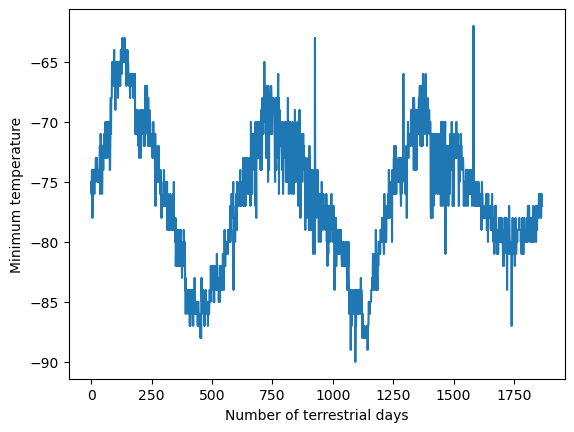

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
df.to_csv('mars_weather_dataframe.csv')

In [152]:
browser.quit()